In [1]:
# ==============================================================================
# # California Car Accident Severity Prediction
#
# **Goal:** To build a machine learning model that can predict the severity of a car accident in California based on various factors like vehicle type, environmental conditions, and driver demographics.
#
# **Research Question:** Can the severity of a car accident (e.g., property damage, injury, or fatality) be accurately predicted based on the vehicle type, involved parties' demographics, and environmental conditions at the time of the incident?
#
# This notebook will guide you through loading the data, cleaning and preparing it for modeling, building a predictive model, and evaluating its performance.
# ==============================================================================

# ==============================================================================
# ## Step 1: Setup and Data Loading
#
# First, we need to import the necessary Python libraries for data manipulation, visualization, and machine learning. Then, we will load our dataset.
#
# **Instructions:**
#
# 1.  Run the first code cell to import the libraries.
# 2.  Load your `combined_accident_data.csv` file. Ensure the file path is correct for your environment.
# 3.  Run the second code cell to load the data into a pandas DataFrame.
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
try:
    df = pd.read_csv('data/combined_accident_data.csv')
    print("Dataset loaded successfully!")
    print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
except FileNotFoundError:
    print("Error: 'combined_accident_data.csv' not found.")
    print("Please make sure the file is in the correct directory or provide the full path.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully!
The dataset has 37654 rows and 80 columns.


In [ ]:
# ==============================================================================
# ## Step 2: Data Exploration and Preprocessing
#
# Now, we will explore the data and prepare it for modeling. This involves:
#
# 1.  **Filtering for California:** As per the research goal, we will only use data for accidents that occurred in California (State code 6).
# 2.  **Selecting Relevant Columns:** We will select a subset of columns relevant to our research question to simplify the model.
# 3.  **Handling Missing Values:** We will check for and handle any missing data.
# 4.  **Preparing the Target Variable:** We will define our target variable, 'severity', based on the `FATALS` column.
# ==============================================================================

# Display basic information about the dataframe
print("\nOriginal Data Info:")
df.info()


Original Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37654 entries, 0 to 37653
Data columns (total 80 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATE         37654 non-null  int64  
 1   STATENAME     37654 non-null  object 
 2   ST_CASE       37654 non-null  int64  
 3   PEDS          37654 non-null  int64  
 4   PERNOTMVIT    37654 non-null  int64  
 5   VE_TOTAL      37654 non-null  int64  
 6   VE_FORMS      37654 non-null  int64  
 7   PVH_INVL      37654 non-null  int64  
 8   PERSONS       37654 non-null  int64  
 9   PERMVIT       37654 non-null  int64  
 10  COUNTY        37654 non-null  int64  
 11  COUNTYNAME    37654 non-null  object 
 12  CITY          37654 non-null  int64  
 13  CITYNAME      37654 non-null  object 
 14  MONTH         37654 non-null  int64  
 15  MONTHNAME     37654 non-null  object 
 16  DAY           37654 non-null  int64  
 17  DAYNAME       37654 non-null  int64  
 18  DAY_W

In [4]:
# Filter for accidents in California (State Code 6)
# Note: Ensure the column name 'STATE' is correct for your dataset
if 'STATE' in df.columns:
    df_ca = df[df['STATE'] == 6].copy()
    print(f"\nFiltered for California. The California dataset has {df_ca.shape[0]} rows.")
else:
    print("\nWarning: 'STATE' column not found. Using the entire dataset.")
    df_ca = df.copy()


Filtered for California. The California dataset has 3727 rows.


In [5]:
# Select a subset of features for our initial model
# We choose features related to environment, vehicle, and driver
features_to_keep = [
    'FATALS',  # Our target variable
    'WEATHER',
    'LGT_COND',
    'BODY_TYP',
    'MAKE',
    'AGE',
    'SEX',
    'HOUR',
    'DAY_WEEK'
]

In [6]:
# Check which of these features are actually in the dataframe
available_features = [feature for feature in features_to_keep if feature in df_ca.columns]
print(f"\nUsing the following available features: {available_features}")

df_model = df_ca[available_features].copy()


Using the following available features: ['FATALS', 'WEATHER', 'LGT_COND', 'HOUR', 'DAY_WEEK']


In [7]:
# --- Preparing the Target Variable 'FATALS' for Regression ---
# The 'FATALS' column directly represents the number of fatalities.
# We will use this as our continuous target variable for regression.

# First, let's see the distribution of the FATALS column
print("\nDistribution of FATALS:")
print(df_model['FATALS'].value_counts())

# We will use the 'FATALS' column as our target variable y
# No binary conversion is needed for regression.
# We will keep the 'FATALS' column in df_model for now until we define X and y.


Distribution of FATALS:
FATALS
1    3456
2     224
3      35
4       8
5       4
Name: count, dtype: int64


In [8]:
# --- Handling Missing Values ---
print("\nMissing values before handling:")
print(df_model.isnull().sum())

# For simplicity, we will drop rows with any missing values
df_model.dropna(inplace=True)
print(f"\nShape of the data after dropping rows with missing values: {df_model.shape}")


Missing values before handling:
FATALS      0
WEATHER     0
LGT_COND    0
HOUR        0
DAY_WEEK    0
dtype: int64

Shape of the data after dropping rows with missing values: (3727, 5)


In [ ]:
# ==============================================================================
# ## Step 3: Feature Engineering (Encoding)
#
# Our model can only work with numbers. We need to convert our categorical features (like weather, light conditions, etc.) into a numerical format. We will use one-hot encoding for this.
# ==============================================================================

# Ensure df_model is the cleaned California data

# Identify categorical columns to be encoded
# Exclude the target variable 'FATALS' from encoding
categorical_cols = df_model.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nCategorical columns to be one-hot encoded: {categorical_cols}")

# Apply one-hot encoding
# Drop the original categorical columns after encoding
df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

print(f"\nShape of the data after one-hot encoding: {df_encoded.shape}")
print("Sample of encoded data:")
print(df_encoded.head())


Categorical columns to be one-hot encoded: []

Shape of the data after one-hot encoding: (3727, 5)
Sample of encoded data:
      FATALS  WEATHER  LGT_COND  HOUR  DAY_WEEK
2686       1       10         2     2         4
2687       1       10         1    99         1
2688       1        1         2     1         2
2689       1        1         2    19         5
2690       1        1         2    22         7


In [10]:
# ==============================================================================
# ## Step 4: Model Building (Regression)
#
# We are now ready to build our machine learning model. We will:
#
# 1.  Split our data into features (X) and the target variable (y).
# 2.  Split the data into training and testing sets.
# 3.  Train a Random Forest Regressor model on the training data.
# ==============================================================================

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define features (X) and target (y)
# X will be all columns in df_encoded except 'FATALS'
X = df_encoded.drop('FATALS', axis=1)
y = df_encoded['FATALS'] # Use FATALS as the target variable for regression

# Split data into training and testing sets (80% training, 20% testing)
# Stratification is not typically used for regression, so we remove it.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

# Initialize and train the Random Forest Regressor
print("\nTraining the Random Forest Regressor model...")
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("Model training complete!")


Data split into training and testing sets:
X_train shape: (2981, 4)
X_test shape: (746, 4)

Training the Random Forest Regressor model...
Model training complete!



--- Model Evaluation (Regression) ---
Mean Absolute Error (MAE): 0.1758
Mean Squared Error (MSE): 0.1712
Root Mean Squared Error (RMSE): 0.4138
R-squared (R2): -0.1932


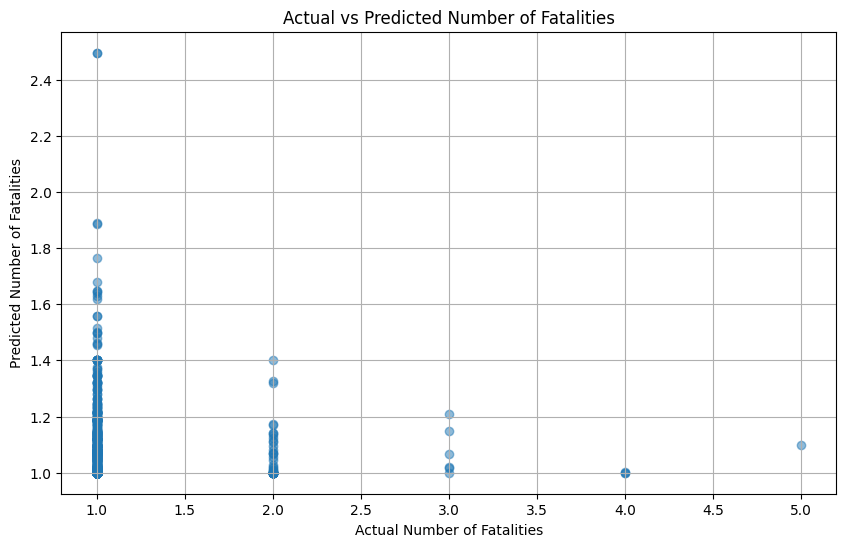

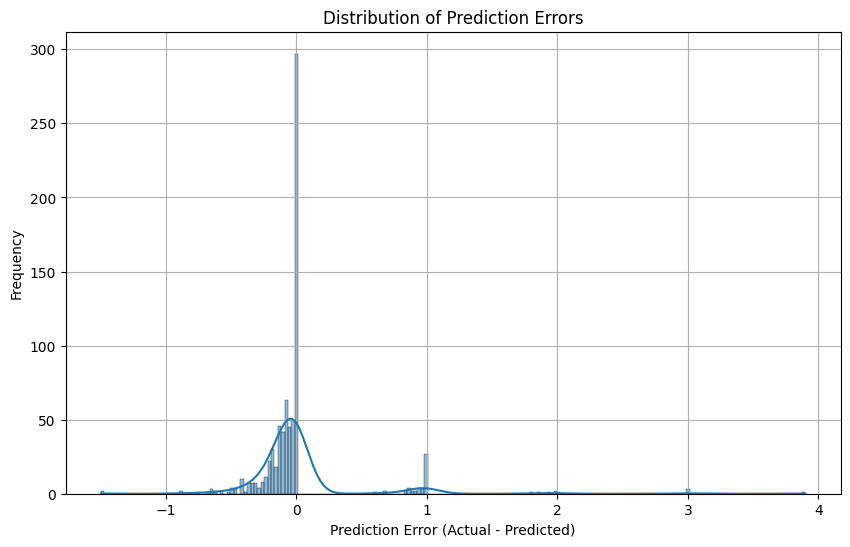

In [11]:
# ==============================================================================
# ## Step 5: Model Evaluation (Regression)
#
# Let's see how well our regression model performs on the test data.
# ==============================================================================

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using regression metrics
print("\n--- Model Evaluation (Regression) ---")

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# For regression, a confusion matrix is not applicable.
# We can visualize the predictions vs actual values or the distribution of errors.

# Example: Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Number of Fatalities")
plt.ylabel("Predicted Number of Fatalities")
plt.title("Actual vs Predicted Number of Fatalities")
plt.grid(True)
plt.show()

# Example: Distribution of Prediction Errors
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.grid(True)
plt.show()

/var/folders/wg/0yvtxm4n0_z_kg6hrcxdpw8h0000gn/T/ipykernel_19650/3403355960.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')


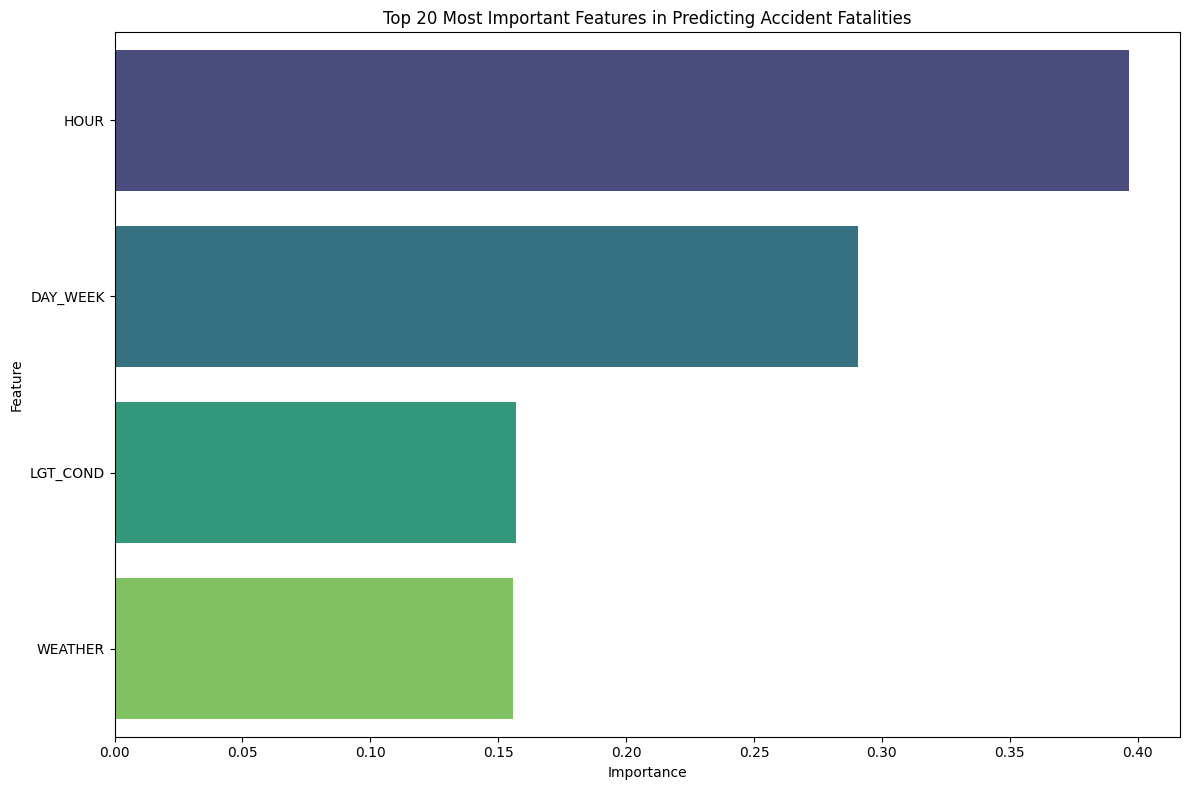

In [14]:
# ==============================================================================
# ## Step 6: Interpretation and Next Steps
#
# A key part of our project is to understand which factors are most influential. We can extract and visualize the feature importances from our Random Forest model.
# ==============================================================================

# Get feature importances from the model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 Most Important Features in Predicting Accident Fatalities')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [13]:
# Check the distribution of the FATALS column in the California data
print("\nDistribution of FATALS in California data:")
print(df_ca['FATALS'].value_counts())

# Filter out rows where FATALS might represent a missing or unknown value (if any)
# Based on the data description or value counts, 99 might indicate unknown.
# Adjust this filtering based on the actual value counts if needed.
df_ca_cleaned = df_ca[df_ca['FATALS'] != 99].copy()

print(f"\nShape of California data after cleaning FATALS column: {df_ca_cleaned.shape}")

# Update df_model to use this cleaned data before selecting features
# This assumes that the next cell selects features from df_ca_cleaned
df_model = df_ca_cleaned.copy()


Distribution of FATALS in California data:
FATALS
1    3456
2     224
3      35
4       8
5       4
Name: count, dtype: int64

Shape of California data after cleaning FATALS column: (3727, 80)
